# Reporte técnico: Educación en los Estados Unidos

Integrantes

*   Juan Esteban Ochoa Gómez
*   Juan David Correa Arango
*   Dioselin Esteban Brito
*   Guillermo Alvarez
*   Santiago Salazar Ramirez

## Introducción

La educación es uno de los pilares más relevantes a la hora de determinar el éxito económico, lo cual provoca una preocupación generalizada por parte de los padres para el otorgar una educación de calidad a sus hijos, previendo así un mejor futuro para ellos. El problema principal es que no se tiene claro qué factores pueden ser críticos para que el estudiante complete sus estudios y para que su educación sea de calidad. El objetivo principal de este trabajo es identificar las barreras claves que desafían los estudiantes y los posibles resultados que pueden provocar, como también qué medidas se deben tomar de acuerdo con las necesidades del estudiante (los padres conocen algunas necesidades de sus hijos, pero al no estar lo suficientemente informados no pueden tomar las mejores decisiones para sus hijos).

El método por emplear para atacar esta problemática será con clustering, el cual se encargará de clasificar grupos de instituciones educativas según las condiciones en las que se encuentren. Con la clasificación ya realizada se facilita el entendimiento de cada grupo de estudiante y el cómo se debe de reforzar la educación en ellos. 

## Objetivos

*   Identificación y caracterización de los diferentes grupos de instituciones educativas que hay en Estados Unidos.
*   Análisis de las posibles medidas a realizar según el grupo de instituciones educativas.
*   Distinción y reconocimiento de los grupos de estudiantes vulnerables.
*   Indagación de la relevancia e incidencia de las variables del estudio.


## Metodología

1.  Preparación de los datos: manejo de los valores nulos, variables categóricas y elección de variables a tratar.
2.  Análisis de las variables seleccionadas: ¿Existen observaciones no consistentes con la definición de la variable?
3.  Correlación entre variables: ¿La correlación entre variables puede afectar el clustering?
4.  Indagación de la cantidad de clusters adecuado para el clustering: Uso de la técnica de codo y dendograma
5.  Realización del clustering.
6.  Caracterización y explicación de los clusters: ¿Qué significa cada agrupación?
7.  Conclusiones y resultados

## Desarrollo

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
import seaborn as sb
warnings.filterwarnings("ignore")

In [ ]:
#Se realiza la lectura de los datos que se encuentran en el archivo CollegeScorecard.csv y se almacena en la variable scoreCard la cual contendra la informacion dada por el departamento de Educación de los Estados Unidos.  
scoreCard = pd.read_csv('CollegeScorecard.csv')

In [ ]:
# Como es sabido, se recomienda no realizar manipulación sobre el conjunto de datos original, por lo que es necesario la crecion de una copia de este, como se muestra a continuación:
scoreCard2 = scoreCard.copy()

Se importa y visualiza uno de los datasets, el cual se llama CollegeScorecard

In [ ]:
# Aquí se visualiza las 5 primeras filas de la tabla CollegeScoreCard, con el fin de observar un poco la forma del conjunto de datos
scoreCard.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385


Ahora procederemos a observar las dimensión de la base de datos con la cual se va a realizar el trabajo, en donde podemos observar que la base de datos conta un un total de 7804 filas y 1725 columnas.

In [ ]:
# En este bloque se muestra en pantalla la dimensión actual de la tabla (# filas x # columnas) con el fin de saber qué tan extensos son los datos a utilizar
print("Filas:",scoreCard.shape[0])
print("Columnas:",scoreCard.shape[1])

Filas: 7804
Columnas: 1725


In [ ]:
#Se realiza la lectura de otros datos y se almacenan en la variable collegeDictionary
collegeDictionary = pd.read_csv('https://query.data.world/s/e3kvsd43y7dyhd5acqetzgv5ccjoti')

Ahora se visualiza el dataset llamado collegeDictionary

In [ ]:
# Aquí se visualizan las primeras filas de collegeDictionary
collegeDictionary.head()

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
0,Unit ID for institution,NaN,root,id,UNITID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
1,8-digit OPE ID for institution,NaN,root,ope8_id,OPEID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
2,6-digit OPE ID for institution,NaN,root,ope6_id,opeid6,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
3,Institution name,2013,school,name,INSTNM,string,NaN,NaN,NaN,Y,IPEDS,NaN
4,City,2013,school,city,CITY,string,NaN,NaN,NaN,Y,IPEDS,NaN


Como también se muestran las dimensiones de dicho dataset, incluyendo 1953 filas y 12 columnas


In [ ]:
# En este bloque se muestra la dimensión de la tabla anteriormente leída (# filas x # columnas)
print("Filas:",collegeDictionary.shape[0])
print("Columnas:",collegeDictionary.shape[1])

Filas: 1953
Columnas: 12


Ahora se realiza la selección de las variables que fueron consideradas de interés para realizar la caracterización, agrupamiento o clustering, para esto se toma la decisión de apoyarse con la clase dada por el Dr. Huebner quien aborda este mismo problema a solucionar por el equipo (Huebner, 2022)

Las variables consideradas fueron:

| Variable      | Definición |
| ----------- | ----------- |
| STABBR      | State abbreviation (Abreviatura del estado)      |
| PREDDEG   |  Type of programs (Tipo de programa)      |
| CONTROL     | Type if school (Tipo de escuela: 1 = publica; 2 = privada sin animo de lucro; 3 = con animo de lucro)     |
| ADM_RATE_ALL  |  Admissions rate (Tasa de admisiones)      |
| SAT_AVG_ALL     |  Average sat score for students admited (Puntuación media en el Sat de los estudiantes admitidos)     |
| UGDS  |  Enrrollment of undergraduate degree-seeking students (Matrícula de los estudiantes que desean obtener un título universitario.)      |
| NPT4_PUB      |  Average net price (Precio medio neto)      |
| NPT4_PRIV  | Average net price (Precio medio neto)      |
| C150_4      | Completion rate (Tasa de finalización)      |
| PCTFLOAN  |   Pct of all undergrads receiving a federal loan (Porcentaje de estudiantes de grado que reciben un préstamo federal)      |
| PCTPELL     |  Pct of all undergrads receiving  a pell grant (Porcentaje de estudiantes de grado que reciben una beca Pell)      |

Se debe de realizar ahora un manejo de los valores nulos, dado que el clustering no aceptará valores que sean nulos. Para el caso de los valores continuos se reemplaza el valor nulo con el valor de la mediana. Luego de este manejo de datos se realiza una verificación de que no existan filas repetidas.

In [ ]:
# En esta sección se hace la elección de las variables que parecen interesantes y que a la vez son indispensables para la realización de la categorización, agrupamiento ó clustering
# Esta elección se hace con base a una clase dada por el Dr. Rich Huebner.  Fuente: https://www.youtube.com/watch?v=h8XZ8kc6uqo
# Para ir al tiempo preciso o de interés visitar el siguiente link: https://youtu.be/h8XZ8kc6uqo?t=1715

variables = ["STABBR","PREDDEG","CONTROL","ADM_RATE_ALL","SAT_AVG_ALL","UGDS","NPT4_PUB","NPT4_PRIV","C150_4","PCTFLOAN","PCTPELL"]
scoreCard2 = scoreCard2[variables]

In [ ]:
# En este bloque se hace un manejo de los valores nan para los datos de tipo continuo
columnas = scoreCard2.columns
for col in columnas:
    if scoreCard2[col].isnull().values.any() == True:
        scoreCard2[col].fillna((scoreCard2[col].median()), inplace=True)

In [ ]:
# Posteriormente se eliminan las filas duplicadas, en caso de existir
scoreCard2.drop_duplicates(inplace=True)

In [ ]:
# Aquí se procede a revisar la cantidad de valores nulos que hay en el dataset
scoreCard2.isnull().values.any()

False

Se realiza los graficós de boxplot para unas variables de interés en especifico como lo son  NPT4_PUB y NPT4_PRIV, dado que estas son valores constantes a analizar.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
# Se realizan los boxplot de NPT4_PUB y NPT4_PRIV, dado que son los valores constantes a analizar
fig.add_trace(go.Box(y=scoreCard2["NPT4_PUB"], name = 'NPT4_PUB',
                marker_color = 'lightseagreen'))

fig.add_trace(go.Box(y=scoreCard2["NPT4_PRIV"], name = 'NPT4_PRIV',
                marker_color = '#FF851B'))                

fig.show()


In [ ]:
# Se realiza un boxplot a UGDS
fig2 = go.Figure()

fig2.add_trace(go.Box(y=scoreCard2["UGDS"], name='UGDS',
                marker_color = 'indianred'))
 
fig2.show()

Se observa en el boxplot la presencia de valores negativos en el promedio neto de los costos de las instituciones algo que no tiene sentido alguno, dado  que se esta hablando de costos a pagar y este no puede ser de carácter negativo. Lo que se realiza es la eliminación de dichos datos

In [ ]:
# El boxplot muestra que existen valores negativos en el promedio neto de los costes de las instituciones,
# lo cual no tiene sentido de por sí (¿Cómo se puede cobrar algo que es menor a 0?)
# Se van a borrar dichos datos 
scoreCard2 = scoreCard2.loc[scoreCard2['NPT4_PRIV'] >= 0]
scoreCard2 = scoreCard2.loc[scoreCard2['NPT4_PUB'] >= 0]

Se procede a la realizar la correlación entre todas las variables seleccionadas anteriormente y poder determinar cual de estar presentan una correlación positiva fuerte, moderada, débil ó negativa fuerte, moderada, débil.

Cabe destacar que la correlación con un valor de 1 solo se presentara en variables que se correlacionan con ellas mismas.

<function matplotlib.pyplot.show(close=None, block=None)>

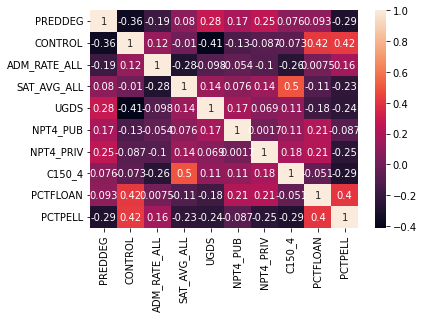

In [ ]:
corrMatrix=scoreCard2.corr()
sb.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (50,50)
plt.show

In [ ]:
# Se realiza una normalización de los datos
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())
scoreCard_org = scoreCard2.copy()
scoreCard2.loc[:, scoreCard2.columns.drop('STABBR')] = minmax_norm(scoreCard2.loc[:, scoreCard2.columns.drop('STABBR')])

Analizando el tipo de correlación que presentan las variables seleccionadas con anterioridad, destacando las que sean mas importantes o significativas.

Se aprecia que CONTROL presenta una correlación positiva débil con las variables PCTPELL y PCTFLOAN, con las demás variables presenta una correlación negativa débil con  UGDS; además se observa que una las variables presentan una correlación positiva moderada es SAT_AVG_ALL con C150_4.

Se procede a realizar la normalización de los datos, la razón por la cual es necesario realizar esto es que el peso de una variable no afecte en gran medida al clustering que se esta desarrollando. La tabla representan los datos luego de la normalización.

In [ ]:
# Se revisa que esta normalización funcionó y se imprime la tabla
scoreCard2.head()

,STABBR,PREDDEG,CONTROL,ADM_RATE_ALL,SAT_AVG_ALL,UGDS,NPT4_PUB,NPT4_PRIV,C150_4,PCTFLOAN,PCTPELL
0,AL,0.75,0.0,0.8989,0.180876,0.024284,0.491928,0.207757,0.2914,0.8204,0.7115
1,AL,0.75,0.0,0.8673,0.552995,0.067140,0.543163,0.207757,0.5377,0.5397,0.3505
2,AL,0.75,0.5,0.7167,0.440092,0.001930,0.321526,0.084264,0.6667,0.7629,0.6839
3,AL,0.75,0.0,0.8062,0.592166,0.033120,0.643236,0.207757,0.4835,0.4728,0.3281
4,AL,0.75,0.0,0.5125,0.188940,0.032095,0.437412,0.207757,0.2517,0.8735,0.8265


A continuación se procederá a realizar un clustering los cuales tienen como objetivo el agrupamiento de variables en grupos con características similares, pero para esto primero procederemos a realizar la curva de codo, la cual nos permite determinar el numero optimo de clústers apropiados para tomar.

In [ ]:
# Hora de realizar el clustering
# Primer paso: curva de codo
tablaClustering = scoreCard2.copy().loc[:, scoreCard2.columns.drop('STABBR')]

In [ ]:
#Elbow Method
def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(data)
    inertias.append(kmeanModel.inertia_)
  
# Grafico de los resultados obtenidos para cada valor del rango
  print("Valores: ",inertias)
  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

Valores:  [2977.745341438802, 1649.7247376082237, 1314.8440413169121, 1125.4535858539048, 974.990078552187, 897.4624946278561, 828.3012771469181, 770.5669463259726, 712.2158039954136, 660.4179924097284, 633.400282472645, 598.0058246959377, 573.7328557355135, 545.7518383152375, 524.3600477962442]


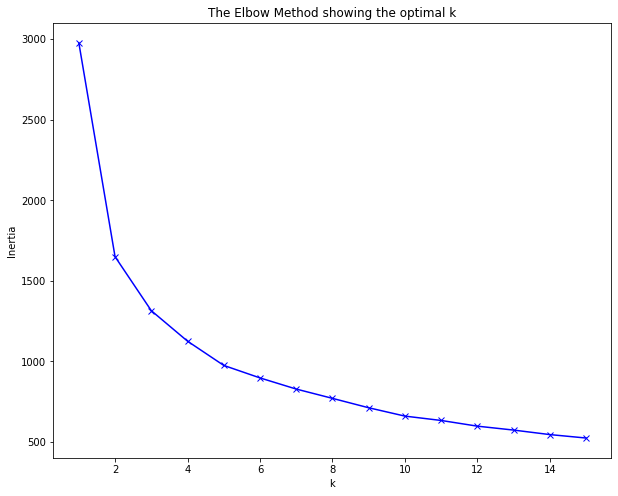

In [ ]:
# Se llama la función de elbow_curve
elbow_curve(np.array(tablaClustering.values))

Se observa que un numero optimo de clústers son 5, dado que en este punto la curva es menos suave. 

El dendograma que realizaremos a continuación es un tipo de representación grafica en forma de árbol que organiza los datos permitiendo ver los datos en subcategorías hasta llegar a un nivel de detalle deseado. 

Text(160.0, 15, ' Cinco grupos')

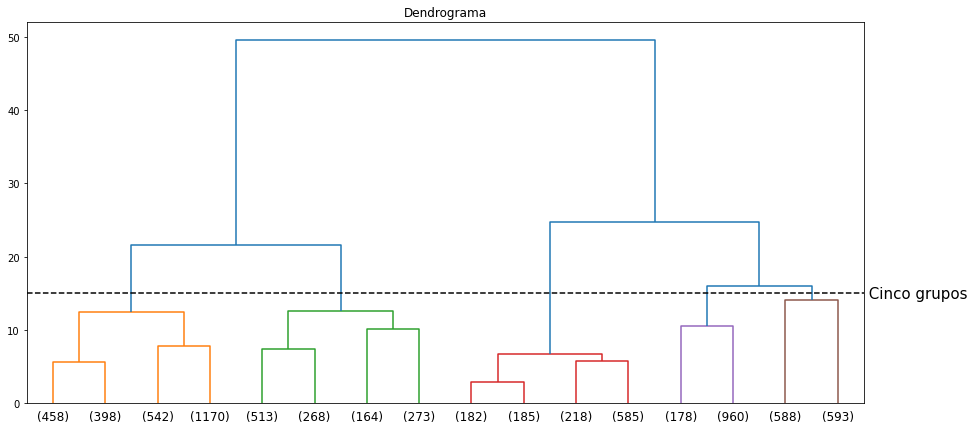

In [ ]:
# Se importan las librerias necesarias para hacer el dendograma
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
# Se establecen las dimensiones para el dendograma
pyplot.figure(figsize=(15, 7))  
# Se establece el título del plot a dendograma
pyplot.title("Dendrograma") 
# Se realiza el dendograma
dend = shc.dendrogram(shc.linkage(np.array(tablaClustering.values), method='ward'),truncate_mode='level',p=3, color_threshold=15)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [15, 15], '--', c='k')
ax.text(bounds[1], 15, ' Cinco grupos', va='center', fontdict={'size': 15})

Como se comento con anteriormente y corroborado por el dendograma el numero optimo de clústers es de 5.

Se decide hacer uso del modelo kmeans con un numero de 5 clúster, para luego realizar un procedimiento para poder determinar si el numero de clústers fue tomado de forma optima.

In [ ]:
# Se hace el modelo Kmeans con 5 clusters
clustering= KMeans(n_clusters=5, random_state=0)
# Se hace el fit de este modelo con los datos de la tabla modificada
clustering.fit(tablaClustering)
# Se muestran los labels del cluster para verificar que funciona
clustering.labels_

array([0, 0, 1, ..., 4, 4, 4], dtype=int32)

Se organiza la tabla para luego poder asignar los niveles de los clústers y asi poder tener una mejor visualización.

In [ ]:
# Se copia la tabla para luego agregar los labels del cluster
final=tablaClustering.copy()
# Se agregan los labels del cluster
final["cluster"]=clustering.labels_
# Se agregan los Estados a los datos
final['States'] = scoreCard2['STABBR']
# Se imprime la tabla

In [ ]:
scoreCard_org['labels'] = final['cluster']
scoreCard_org

,STABBR,PREDDEG,CONTROL,ADM_RATE_ALL,SAT_AVG_ALL,UGDS,NPT4_PUB,NPT4_PRIV,C150_4,PCTFLOAN,PCTPELL,labels
0,AL,3,1,0.8989,823.0,4051.0,13415.0,18259.0,0.29140,0.8204,0.7115,0
1,AL,3,1,0.8673,1146.0,11200.0,14805.0,18259.0,0.53770,0.5397,0.3505,0
2,AL,3,2,0.7167,1048.0,322.0,8792.0,7455.0,0.66670,0.7629,0.6839,1
3,AL,3,1,0.8062,1180.0,5525.0,17520.0,18259.0,0.48350,0.4728,0.3281,0
4,AL,3,1,0.5125,830.0,5354.0,11936.0,18259.0,0.25170,0.8735,0.8265,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7771,SC,0,3,0.7167,1048.0,432.5,8792.0,18259.0,0.46545,0.5926,0.5165,4
7790,MN,0,3,0.7167,1048.0,432.5,8792.0,18259.0,0.46545,0.5926,0.5165,4
7791,IL,0,3,0.7167,1048.0,432.5,8792.0,18259.0,0.46545,0.5926,0.5165,4
7794,KS,0,3,0.7679,1048.0,432.5,8792.0,18259.0,0.46545,0.5926,0.5165,4


In [ ]:
_deepnote_run_altair(scoreCard_org, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":true},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"labels","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"CONTROL","type":"quantitative","sort":null,"scale":{"type":"linear","zero":true}},"color":{"field":"labels","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [ ]:
# Step 1: Import needed libraries, we're going to use display to show an HTML
from IPython import display

#Import library for explanation
from IPython.display import Image
# Step 4: Replace embed code from step 2
# Copy and uncomment the code provided in step 2, and replace the copy code from step 3.4 at {HTML Script to embedding}

#---
iFrame='''
<div class='tableauPlaceholder' id='viz1662946789652' style='position: relative'><noscript><a href='#'><img alt='Análisis Instituciones educativas de USA por grupos  ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;En&#47;Ensayo_16628681588000&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Ensayo_16628681588000&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;En&#47;Ensayo_16628681588000&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1662946789652');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='800px';vizElement.style.height='1200px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1200px';vizElement.style.height='1627px';} else { vizElement.style.width='100%';vizElement.style.height='3177px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>
'''

display.HTML(iFrame)

Se obtuvieron 5 grupos, de los cuales se pueden caracterizar de la siguiente manera:

- El grupo 0, tiene las instituciones publicas y con mayor promedio de matriculas de estudiantes que desean obtener un título.

- El grupo 1, tiene las instituciones privadas con ánimos de lucro, con menor procentaje en promedio de admisión, con poco porcentaje de becas pell, y con un apoyo significativo por parte del estado.

- El grupo 2, tiene las instituciones privadas con ánimos de lucro, que tienen el mayor porcentaje promedio de apoyo de préstamo por el estado y también con un gran porcentaje a las beca pell, por lo tanto, es el grupo donde se tiene mayor porcentaje de ingreso.

- El grupo 3,  tiene las instituciones privadas sin animos de lucros y con menor apoyo por parte del estado, sin embargo, tiene muy buena posibilidad de admisión.

- El grupo 4, tiene las instituciones privadas con ánimos de lucro, con muy poco promedio de estudiantes que desean obtener un título, y con un apoyo regular tanto por el estado y las becas pell.

## Conclusiones y resultados

Según los resultados del clustering, podemos concluir que cada grupo representa cierta ventaja según las necesidades del estudiante, es decir, que no todo grupo representa el esquema general de la educación necesaria para un estudiante. Un ejemplo del grupo deseable según la necesidad es el grupo 3, puesto provee la facilidad de ser admitido. 

Este trabajo debe de tener una continuación que tenga como objetivo la propuesta de soluciones según las metas y objetivos del estudiante, visto que sería una oportunidad competitiva para el momento de adquirir educación de calidad. ¿De qué formas podrían resolverse las necesidades de esta población? Con la participación del Estado, el cual sería el encargado de entender el contexto social del estudiante para así entregar el mejor modelo que se ajuste a él.

Este proyecto también formula un reto a una problemática más directa a nuestro grupo de trabajo: ¿Qué problemáticas poseen los estudiantes colombianos a la hora de acceder a la educación? Teniendo en cuenta el desarrollo de este trabajo se debe de formular una investigación que investigue los diferentes grupos según las capacidades del estudiante.

# Clustering con datos colombianos

## Introducción

Colombia se define a sí mismo como un país en desarrollo, lo que implica que sigue teniendo problemáticas preocupantes en lo que concierne a pobreza, educación, salud, industria, agricultura, etc. El desarrollo de este proyecto se centró en educación, en vista de que uno de los pilares más relevantes para el ejercicio de la ciudadanía es la educación. La educación colombiana es demasiado desigual, siendo crítica en la educación publica y en zonas rurales, llegando inclusive a poseer una de las tasas más altas de repetición escolar. El reporte del banco mundial es muy claro con ello, afirmando que: "Colombia tiene la segunda tasa de repetición más grande entre todos los países que
 participan en el examen del Programa de Evaluación Internacional de Estudiantes (PISA): el 41
 % de los estudiantes de 15 años ha repetido, al menos un grado." (World Bank Group, 2021, p.22)

El objetivo del proyecto será analizar los diferentes grupos de estudiantes según la calidad educativa que reciben, siguiendo siempre la meta de proponer diferentes soluciones según el contexto en donde se ubica cada grupo. Uno de los pilares del proyecto es conocer el por qué del comportamiento de cada grupo, es decir, ¿Qué factores pueden afectar la calidad de educativa de un estudiante?

## Objetivos

- Detectar las posibles fuentes de información que sean funcionales para la misión del proyecto.

- Analizar los diferentes grupos de estudiantes según su calidad académica.

- Determinar los factores claves que hacen distinguir un grupo de otro.

## Dataset

La base de datos a seleccionar es la que proporciona ICFES, ya que permite analizar los diferentes desempeños según la asignatura. Con los diferentes desempeños se podría analizar la calidad de cada institución educativa, comparando su nivel según la calificación media de los estudiantes.

## Metodología

1. Entendimiento de los datos del ICFES: valoración de la relevancia de las variables.

undefined. Limpieza del dataset: Manejo de valores nulos y elección de variables a utilizar.

undefined. Preparación del cluster: ¿Qué variables pueden ser nocivas para el análisis?, ¿Qué variables poseen alta correlación entre ellas?

undefined. Explicación del clustering: ¿Qué representa cada grupo?, ¿Qué factores son importantes a tener en cuenta para que un grupo se defina como tal?

undefined. Conclusiones.

# Referencias

*   Huebner, R. (2022, 17 agosto). Introduction to Hierarchical Clustering with College Scorecard Data. Youtube. https://www.youtube.com/watch?v=h8XZ8kc6uqo.

- World Bank Group. (2021). Hacia la construcción de una sociedad equitativa en Colombia.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=daaab6da-726b-43b4-917f-e59c15dec965' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>